<a href="https://colab.research.google.com/github/sprucesunday777/nsisong-data-science/blob/main/COVID_19_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Title : Sentiment Analysis of COVID-19 tweets
Problem Description:This challenge asks you to build a classification model to predict the sentiment of COVID-19
tweets.

## import the necessary libraries

In [ ]:

!pip install pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.5/343.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install datasist
import datasist as ds

In [ ]:
df = pd.read_csv('/content/Corona_NLP_test.csv')

In [ ]:
df.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [ ]:
ds.structdata.describe(df)

First five data points


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral




Random five data points


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
851,852,45804,Earth,12-03-2020,"Online gaming, internet shopping and book sale...",Negative
1382,1383,46335,NaN,13-03-2020,@BernaMeaden Good point! Similar problem with ...,Extremely Negative
1787,1788,46740,All tweets are opinion,13-03-2020,Go shopping in pairs for safety. Just saw a gr...,Positive
3149,3150,48102,"Colorado, USA",15-03-2020,"@jhall @karaswisher This beach crowding, conce...",Positive
208,209,45161,"Princeton, NJ",11-03-2020,Our #webinar will be live in just 10 min! NetE...,Neutral




Last five data points


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
3797,3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive




Shape of  data set: (3798, 6)


Size of  data set: 22788


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
UserName,int64
ScreenName,int64
Location,object
TweetAt,object
OriginalTweet,object
Sentiment,object




Column(s) {'TweetAt'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['UserName', 'ScreenName']


Categorical Features in Data set


['Location', 'TweetAt', 'OriginalTweet', 'Sentiment']



Statistical Description of Columns


,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000




Description of Categorical Features


,count,unique,top,freq
Location,2964,1717,United States,75
TweetAt,3798,15,13-03-2020,1233
OriginalTweet,3798,3798,TRENDING: New Yorkers encounter empty supermar...,1
Sentiment,3798,5,Negative,1041




Unique class Count of Categorical features


,Feature,Unique Count
0,Location,1718
1,TweetAt,15
2,OriginalTweet,3798
3,Sentiment,5




Missing Values in Data


,features,missing_counts,missing_percent
0,UserName,0,0.0
1,ScreenName,0,0.0
2,Location,834,22.0
3,TweetAt,0,0.0
4,OriginalTweet,0,0.0
5,Sentiment,0,0.0


We only have null values at location column

Unique Values in Location is too large to plot


Unique Values in OriginalTweet is too large to plot




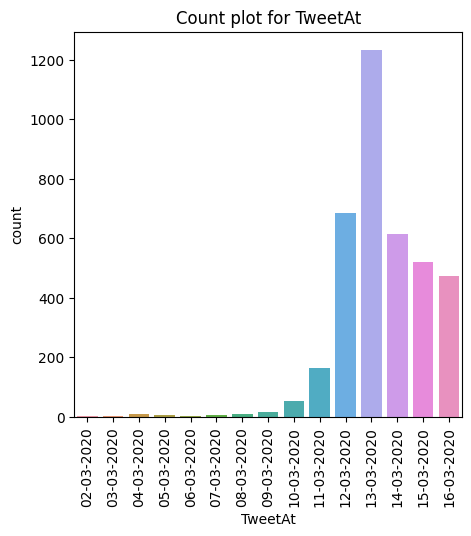

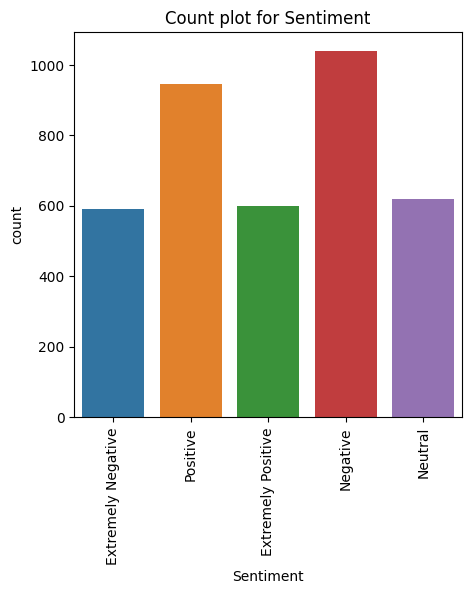

In [ ]:

ds.visualizations.countplot(df)

The first figure shows we have more tweets on march 3 and it was more of negative tweets

<ipython-input-8-2f92b00fe2f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

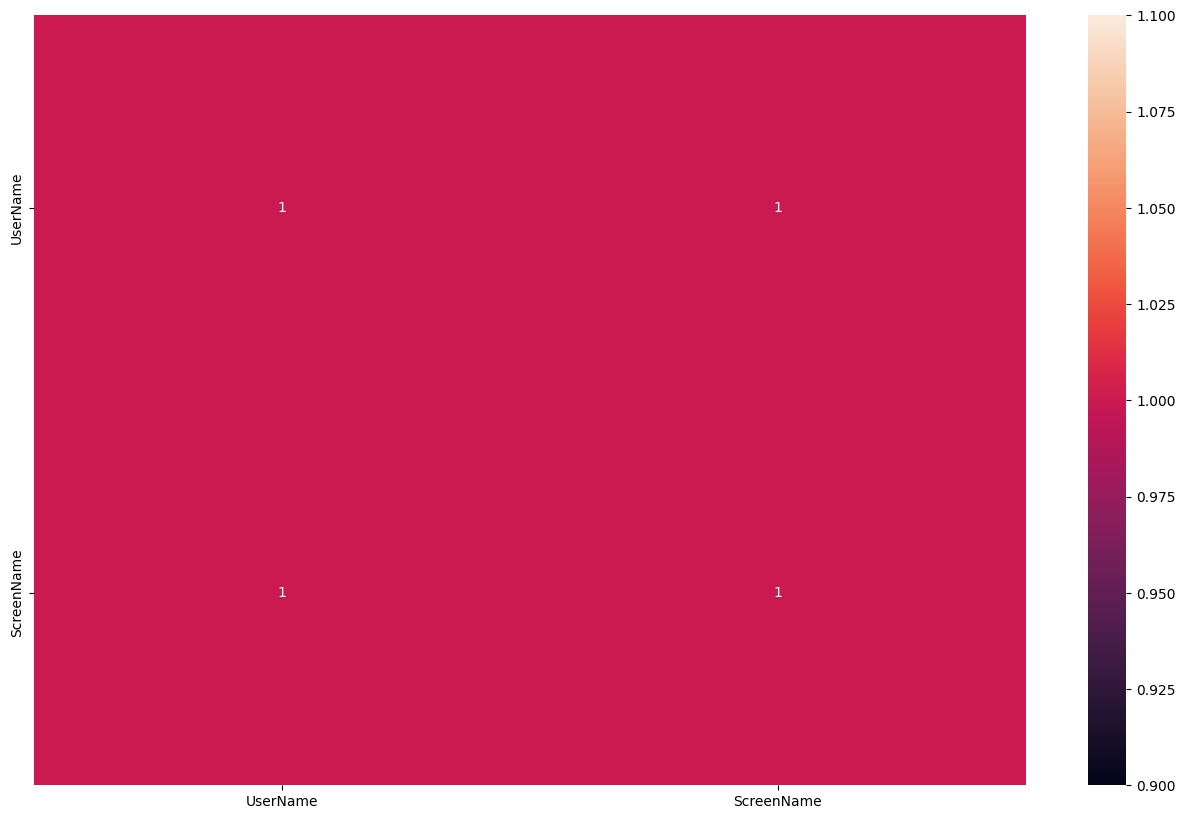

In [ ]:
plt.rcParams['figure.figsize']=[16,10]
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
df['Location'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       NYC
1               Seattle, WA
2                       NaN
3               Chicagoland
4       Melbourne, Victoria
               ...         
3793              Israel ??
3794         Farmington, NM
3795          Haverford, PA
3796                    NaN
3797    Arlington, Virginia
Name: Location, Length: 3798, dtype: object>

In [ ]:
# lets find out top 10 locations
toploc_df = pd.DataFrame(df.Location.value_counts().head(10))

In [ ]:
toploc_df.reset_index(inplace=True)
toploc_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)

In [ ]:
toploc_df

,Location,Location_Count
0,United States,75
1,"London, England",48
2,"Washington, DC",38
3,"New York, NY",34
4,"Los Angeles, CA",33
5,"Toronto, Ontario",29
6,Canada,29
7,"California, USA",26
8,London,25
9,Toronto,21


In [ ]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1,0.0,0.2,0.1)
# Creating color parameters
colors = ( "orange", "cyan", "brown",
"grey", "indigo", "beige", "tomato","coral", "pink","violet")

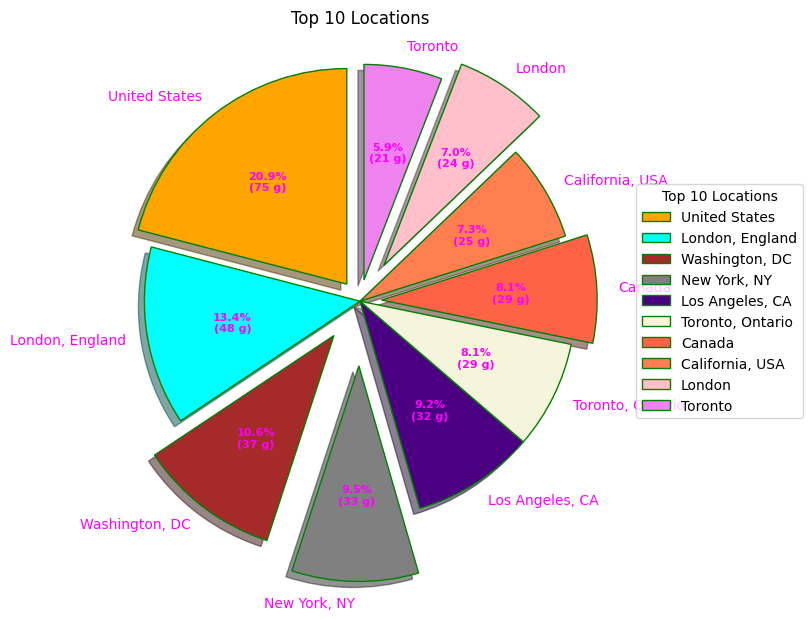

In [ ]:
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating autocpt arguments
def func(pct, allvalues):
      absolute = int(pct / 100.*np.sum(allvalues))
      return "{:.1f}%\n({:d} g)".format(pct, absolute)
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(toploc_df['Location_Count'],
                                autopct = lambda pct: func(pct, toploc_df['Location_Count']),
                                explode = explode,
                                labels = toploc_df['Location'],
                                shadow = True,
                                colors = colors,
                                startangle = 90,
                                wedgeprops = wp,
                                textprops = dict(color ="magenta"))
# Adding legend
ax.legend(wedges, toploc_df['Location'],
title ="Top 10 Locations",
loc ="center left",
bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 10 Locations")
# show plot
plt.show()

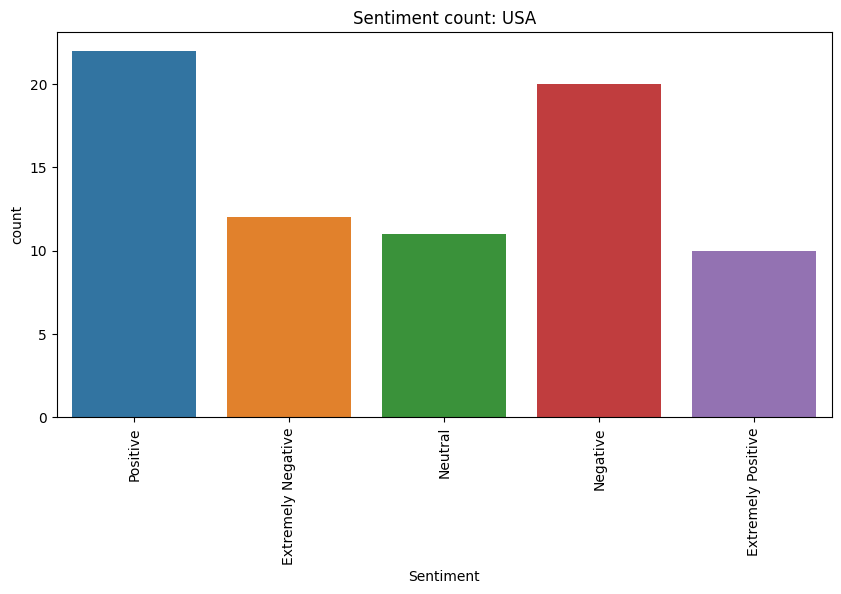

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'] == 'United States'], x='Sentiment')
plt.title('Sentiment count: USA')
plt.xticks(rotation=90)
plt.show()

Tweet from USA were more of positive tweet same with London

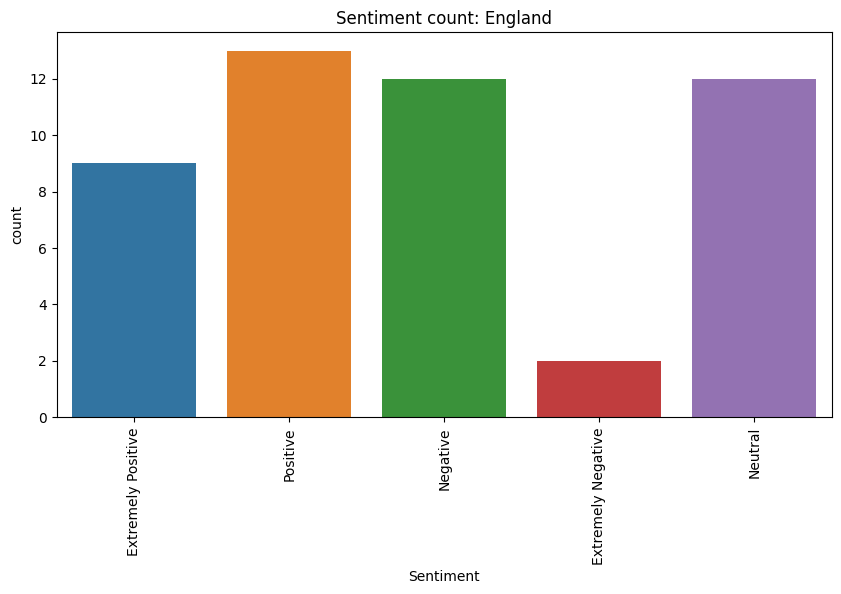

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'] == 'London, England'], x='Sentiment')
plt.title('Sentiment count: England')
plt.xticks(rotation=90)
plt.show()

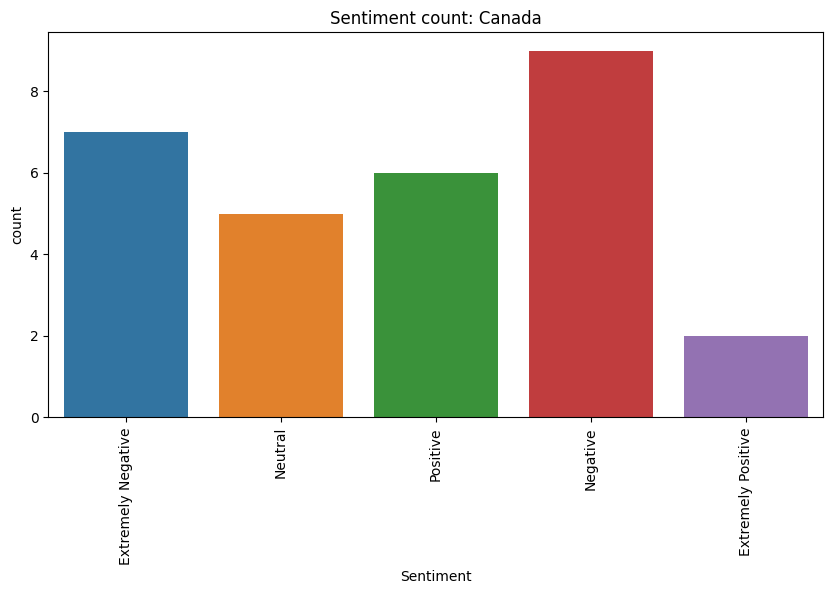

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'] == 'Canada'], x='Sentiment')
plt.title('Sentiment count: Canada')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
df['preprocessed_txt'] = df['OriginalTweet'].apply(preprocess)

In [ ]:
df.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,preprocessed_txt
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending New Yorkers encounter supermarket she...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,find hand sanitizer Fred Meyer turn Amazon $ 1...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,find protect love one coronavirus
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hit NewYork City anxious shopper ...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronaviru coronavirusa...
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,remember time pay $ 2.99 gallon regular gas Lo...
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,vote age coronavirus = hand sanitizer SuperTue...
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral,@drtedro cant stop covid19 protect healthwork...
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative,HI TWITTER pharmacist sell hand sanitizer livi...
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive,supermarket day go NORMAL shop night amp sight...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

Now let's remove punctuation marks and hashtag

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
# create a new column
df['preprocessed_txt'] = df['OriginalTweet'].apply(text_process)

In [ ]:
df.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,preprocessed_txt
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,TRENDING New Yorkers encounter empty supermark...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,couldnt find hand sanitizer Fred Meyer turned ...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,Find protect loved ones coronavirus
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,Panic buying hits NewYork City anxious shopper...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,remember last time paid 299 gallon regular gas...
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,Voting age coronavirus hand sanitizer SuperTue...
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral,DrTedros cant stop COVID19 without protecting...
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative,HI TWITTER pharmacist sell hand sanitizer livi...
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive,Anyone supermarket last days Went NORMAL shop ...


In [ ]:


from wordcloud import WordCloud

In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'preprocessed_txt'],
      dtype='object')

In [ ]:
df['Sentiment']. unique ()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

I noticed that they were no differences between extremely positive and positive same with extremely negative and negative tweets, so I joined extremely positive tweet and positive tweet together

In [ ]:
df['Sentiment_cat'] = df['Sentiment'].replace({"Positive":3,'Negative':2,'Neutral':1,'Extremely Positive':3,'Extremely Negative':2})

Visualizing common words people used when their tweets are neutral

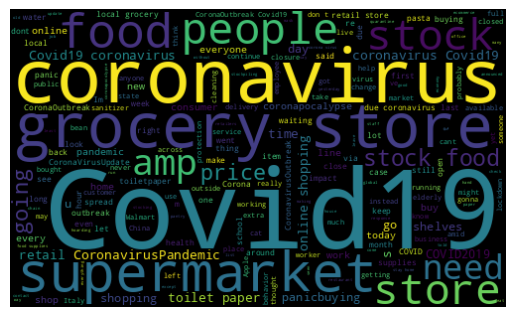

In [ ]:

all_Words = ' '.join([twts for twts in df['preprocessed_txt'][df['Sentiment_cat']==1]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing common words people used when their tweets are negative

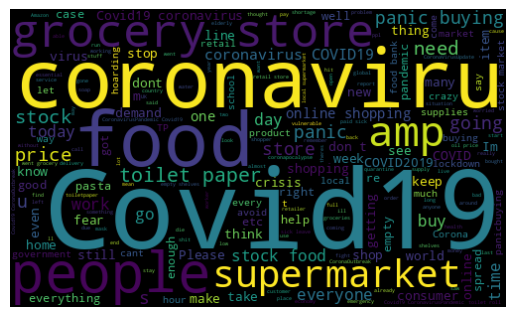

In [ ]:

all_Words = ' '.join([twts for twts in df['preprocessed_txt'][df['Sentiment_cat']==2]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing common words people used when their tweets are positive

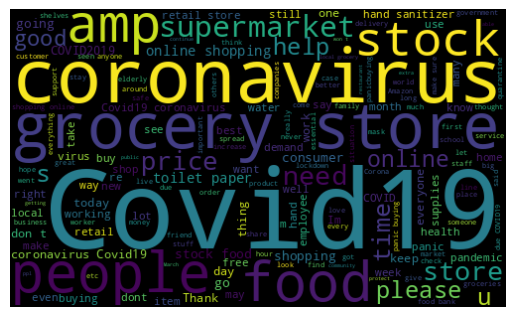

In [ ]:

all_Words = ' '.join([twts for twts in df['preprocessed_txt'][df['Sentiment_cat']==3]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.isnull().sum()

UserName              0
ScreenName            0
Location            834
TweetAt               0
OriginalTweet         0
Sentiment             0
preprocessed_txt      0
Sentiment_cat         0
dtype: int64

##Model Training

In [ ]:
df1 = df[['preprocessed_txt','Sentiment_cat']]

In [ ]:
x=df1['preprocessed_txt']
y=df1['Sentiment_cat']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=0,stratify = df1.Sentiment_cat) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [ ]:
xtrain

<3038x12268 sparse matrix of type '<class 'numpy.float64'>'
	with 56875 stored elements in Compressed Sparse Row format>

##Counter Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stop = list(stopwords.words('english'))
vectorizer = TfidfVectorizer(decode_error = 'replace',stop_words = stop)
xtrain1= vectorizer.fit_transform(xtrain)
xtest1 = vectorizer.transform(xtest)

ytrain1 = ytrain
ytest1 = ytest
print("X_train.shape : ", xtrain1.shape)
print("X_test.shape : ", xtest1.shape)
print("y_train.shape : ", ytrain1.shape)
print("y_test.shape : ", ytest1.shape)

X_train.shape :  (3038, 12268)
X_test.shape :  (760, 12268)
y_train.shape :  (3038,)
y_test.shape :  (760,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stop = list(stopwords.words('english'))
vectorizer = TfidfVectorizer(decode_error = 'replace',stop_words = stop)
xtrain= vectorizer.fit_transform(train.preprocessed_txt.values)
xtest = vectorizer.transform(test.preprocessed_txt.values)
ytrain = train.Sentiment_cat.values
ytest = test.Sentiment_cat.values
print("X_train.shape : ", xtrain.shape)
print("X_test.shape : ", xtest.shape)
print("y_train.shape : ", ytrain.shape)
print("y_test.shape : ", ytest.shape)

X_train.shape :  (3038, 12268)
X_test.shape :  (760, 12268)
y_train.shape :  (3038,)
y_test.shape :  (760,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [ ]:

from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(xtrain1,ytrain1)
NB_prediction = naiveByes_clf.predict(xtest1)
NB_accuracy = accuracy_score(ytest1,NB_prediction)
print("training accuracy Score : ",naiveByes_clf.score(xtrain1,ytrain1))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,ytest1))

training accuracy Score :  0.815668202764977
Validation accuracy Score :  0.5921052631578947
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.80      0.57      0.67       463
           3       0.61      0.63      0.62       297

    accuracy                           0.59       760
   macro avg       0.47      0.40      0.43       760
weighted avg       0.73      0.59      0.65       760



In [ ]:

logreg= LogisticRegression()
logreg.fit(xtrain1, ytrain1)
logreg_prediction = logreg.predict(xtest1)
logreg_accuracy = accuracy_score(ytest1,logreg_prediction)
print("Training accuracy Score : ",logreg.score(xtrain1,ytrain1))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,ytest1))

Training accuracy Score :  0.9186965108624094
Validation accuracy Score :  0.6605263157894737
              precision    recall  f1-score   support

           1       0.23      0.72      0.35        40
           2       0.77      0.64      0.70       395
           3       0.72      0.68      0.70       325

    accuracy                           0.66       760
   macro avg       0.57      0.68      0.58       760
weighted avg       0.72      0.66      0.68       760



In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(xtrain1,ytrain1)
rf_prediction = rf_clf.predict(xtest1)
rf_accuracy = accuracy_score(ytest1,rf_prediction)
print("Training accuracy Score : ",rf_clf.score(xtrain1,ytrain1))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,ytest1))

Training accuracy Score :  1.0
Validation accuracy Score :  0.6381578947368421
              precision    recall  f1-score   support

           1       0.45      0.61      0.52        92
           2       0.73      0.60      0.66       402
           3       0.61      0.71      0.66       266

    accuracy                           0.64       760
   macro avg       0.60      0.64      0.61       760
weighted avg       0.66      0.64      0.64       760



In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
sgd_clf.fit(xtrain1,ytrain1)
sgd_prediction = sgd_clf.predict(xtest1)
sgd_accuracy = accuracy_score(ytest1,sgd_prediction)
print("Training accuracy Score : ",sgd_clf.score(xtrain1,ytrain1))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,ytest1))

Training accuracy Score :  0.9980250164581962
Validation accuracy Score :  0.6473684210526316
              precision    recall  f1-score   support

           1       0.37      0.53      0.44        86
           2       0.73      0.65      0.69       368
           3       0.67      0.68      0.67       306

    accuracy                           0.65       760
   macro avg       0.59      0.62      0.60       760
weighted avg       0.67      0.65      0.65       760



## saving model for deployment

In [ ]:
import pickle

file=open('logreg.pkl','wb')
pickle.dump(logreg,file)